# Compare the best configurations

In [1]:
# import needed libs

%load_ext autoreload

# Auto reloading causes the kernel to reload the libraries we have
%autoreload 2

# usual imports for visualization, etc.
import numpy as np
import matplotlib.pyplot as plt

import datetime

# make it reproducible
np.random.seed(0)

# show plots inline
%matplotlib inline

In [2]:
# Some initializations

from envs import SmartVac
from agents import ReinforceAgent, ReinforceWithBaselineAgent, ActorCriticAgent

max_episode_steps = 100
results_folder = 'res/'
figs_folder = 'figs/'

In [23]:
def run_reinforce_agent(alpha):
    AgentClass = ReinforceAgent
    
    params_str = f'alpha_{alpha}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha=alpha)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    avgs = np.mean(np.array(mult_avgs), axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha: {alpha}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return avgs

def run_reinforce_with_baseline_agent(alpha_theta=0.1, alpha_w=0.01):
    AgentClass = ReinforceWithBaselineAgent
    
    params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    avgs = np.mean(np.array(mult_avgs), axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return avgs

def run_actor_critic_agent(alpha_theta=0.1, alpha_w=0.01):
    AgentClass = ActorCriticAgent

    params_str = f'alpha_theta_{alpha_theta}_alpha_w_{alpha_w}_episodes_{episode_count}'

    agent_name = AgentClass.__name__

    mult_avgs = []
    mult_probs1 = []
    mult_probs2 = []
    for i_test in range(num_of_tests):
        print()
        print(i_test + 1, end=' ')

        # Initialize the agent
        agent = AgentClass(alpha_w=alpha_w, alpha_theta=alpha_theta)

        avgs = []
        probs1 = []
        probs2 = []

        episode_rewards = np.zeros(episode_count)
        for i_episode in range(episode_count):
            done = False
            totalReward = 0

            if i_episode >= plot_count and (i_episode % plot_count == 0):
                avg = np.average(episode_rewards[i_episode - plot_count:i_episode])
                avgs.append(avg)

                # deterministic position
                env.x = 0
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs1.append(prob)

                # stochastic position
                env.x = 1
                env.y = 1
                obs = env.get_obs()
                prob = agent.get_action_vals_for_obs(obs)
                probs2.append(prob)

                print('#', end='', flush=True)
                if len(avgs) % 100 == 0:
                    print(i_episode)

            obs = env.reset()
            action = agent.start(obs)

            step = 0
            while not done:
                obs, reward, done = env.step(action)
                action = agent.step(obs, reward, done)
                totalReward += reward

                step += 1
                if step > max_episode_steps:
                    done = True

            episode_rewards[i_episode] = totalReward
            agent.update_for_episode()

        mult_avgs.append(avgs)
        mult_probs1.append(probs1)
        mult_probs2.append(probs2)

    avgs = np.mean(np.array(mult_avgs), axis=0)
    
    results_tmp = f'\n\nAgent: {agent_name} \tAlpha_w: {alpha_w}\tAlpha_theta: {alpha_theta}'
    results_tmp += f'\nAverage: \t\t{np.mean(avgs):5.3f}'
    results_tmp += f'\nBest {plot_count} Average: \t{np.max(avgs):5.3f}'
    results_tmp += f'\nLast {plot_count} Average: \t{avgs[-1]:5.3f}'
    print(results_tmp)
    
    return avgs
    
def plot_agent(avgs, agent_name):
    plt.figure(1, figsize=(14,10))
    plt.plot(avgs, label=agent_name)
    plt.title(f'Average Return in {episode_count} episodes')
    plt.xlabel(f'index')
    plt.ylabel(f'Average Return per {plot_count} episodes')
    plt.axhline(y=best_performance, linewidth=1, color="g", linestyle='--')
    # plt.savefig(f'{figs_folder}agent_{agent_name}_{params_str}.png')

In [28]:
best_performance = 0.63
env = SmartVac()
num_of_tests = 10
episode_count = 10000
plot_count = int(episode_count / 100)

avgs1 = run_reinforce_agent(alpha=0.25)
avgs2 = run_reinforce_with_baseline_agent(alpha_theta=0.25, alpha_w=0.25)
avgs3 = run_actor_critic_agent(alpha_theta=0.5, alpha_w=0.25)


1 ###################################################################################################
2 ###################################################################################################
3 ###################################################################################################
4 ###################################################################################################
5 ###################################################################################################
6 ###################################################################################################
7 ###################################################################################################
8 ###################################################################################################
9 ###################################################################################################
10 ##############################################################################

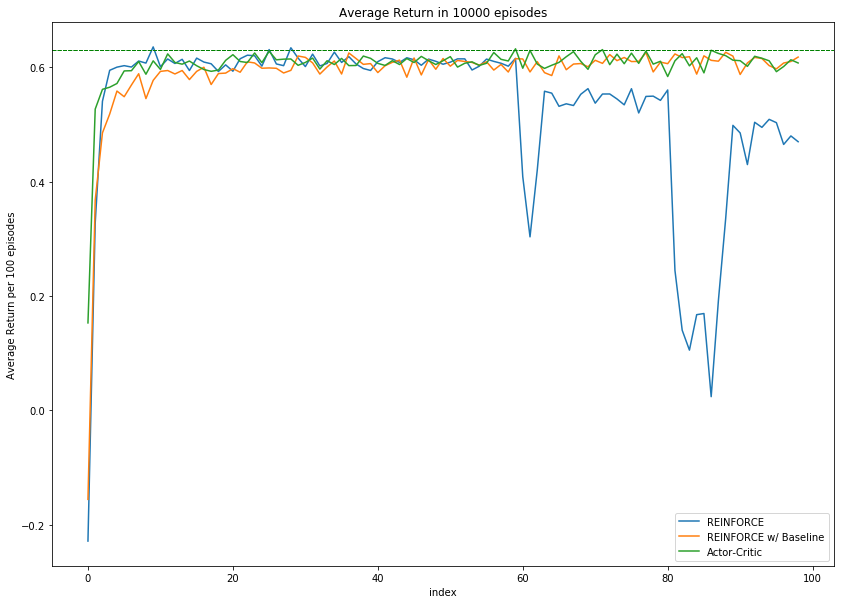

In [29]:
plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.show()

# Compare Best Configuration for other rewards

In [ ]:
best_performance = -1.37
env = SmartVac(terminal_rewards=(-1,-3))
num_of_tests = 10
episode_count = 10000
plot_count = int(episode_count / 100)

avgs1 = run_reinforce_agent(alpha=0.25)
avgs2 = run_reinforce_with_baseline_agent(alpha_theta=0.25, alpha_w=0.25)
avgs3 = run_actor_critic_agent(alpha_theta=0.5, alpha_w=0.25)


1 ###################################################################################################
2 #############

In [ ]:
plot_agent(avgs1, 'REINFORCE')
plot_agent(avgs2, 'REINFORCE w/ Baseline')
plot_agent(avgs3, 'Actor-Critic')
plt.legend()
plt.show()